In [53]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_wine
data=pd.DataFrame(load_wine().data)
data.columns=load_wine().feature_names
data['class']=load_wine().target
data.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [54]:
# to set a style of graph in seaborn, use set_style().
# Style can be darkgrid, whitegrid, dark, white, ticks
# colour palette can be set to specify different colour themes
# tick size can be specified also
# context can be poster, talk or paper
sns.set_style('white')
sns.color_palette("pastel")
sns.set_context("poster", font_scale=1.5)
sns.set_style('ticks', {"xtick.major.size": 2, "ytick.major.size": 2})


## Histograms and density plots
data is split into a set of bins and the count of observations falling in each bin is shown using the height of the bar

(array([0.03004266, 0.09012798, 0.21029862, 0.42059725, 1.2918344 ,
        1.62230367, 0.93132248, 0.60085321, 0.09012798, 0.06008532]),
 array([1.36 , 1.547, 1.734, 1.921, 2.108, 2.295, 2.482, 2.669, 2.856,
        3.043, 3.23 ]),
 <a list of 10 Patch objects>)

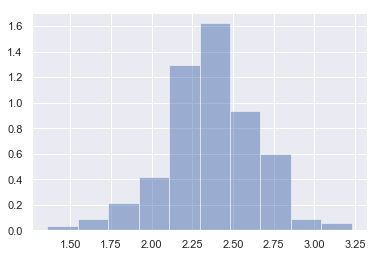

In [7]:
# in matplot lib...
plt.hist(data['ash'], normed=True, alpha=0.5)


In seaborn, distributions can be plotted with:

histplot()- Plot univariate or bivariate histograms to show distributions of datasets.

kdeplot()- Plot univariate or bivariate distributions using kernel density estimation.

ecdfplot() - Plot empirical cumulative distribution functions.


rugplot()- Plot marginal distributions by drawing ticks along the x and y axes.

These are grouped within the default displot() (which is similar to histplot()), displot() and pairplot().
so histplot, kdeplot and ecdfplot can all be used with displot() by calling kind= 'kde', 'hist', 'ecf'



in Seaborn, displot()/histplot() choose a default bin size based on the variance of the data and the number of observations, or we can specify the bin number using 'bins='. 'hue' can be used to seperate histograms based on a class or classification.
eg



## Univariate distributions

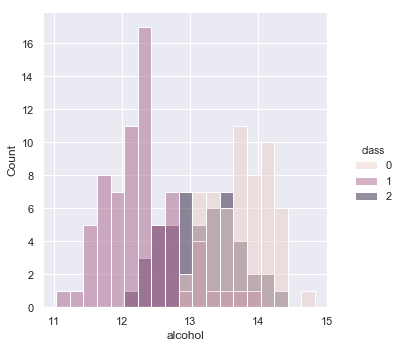

In [21]:
sns.displot(data, x='alcohol', binwidth=.2, hue='class')

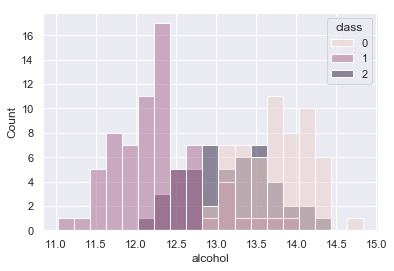

In [23]:
sns.histplot(data, x='alcohol', binwidth=.2, hue='class')

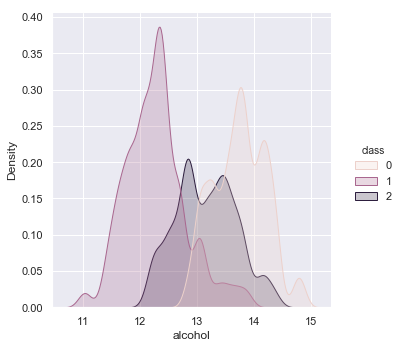

In [37]:
# in seaborn, kernel density estimation returns a smooth estimate of the distribution, with a Gaussian kernel, producing a continuous density estimate
# we can adjust the bandwidth which can avoid 'over smoothening' with 'bw_adjust='
# KDE however can sometimes poorly represent data due to the assumption data is smooth and unbounded.
# KDE approach also fails for discrete data 
sns.set()
sns.displot(data, x='alcohol', kind='kde', bw_adjust=0.5, hue='class', fill=True)

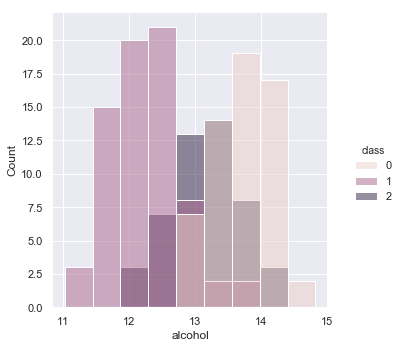

In [34]:
# instead of using distributions, we can normalise counts using 'stat= 'count', 'density', 'probability', 'frequency''
sns.displot(data, x='alcohol', kind='hist', stat='count', hue='class')

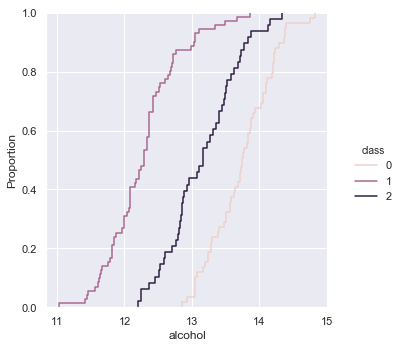

In [39]:
# the ecdf plot draws a monotonically-increasing curve through each datapoint
# it is well suited to comparing multiple distributions
sns.displot(data, x="alcohol", kind="ecdf", hue='class')

## Bivariate distributions

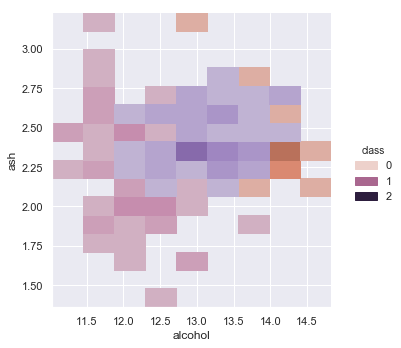

In [42]:
# Assigning a second variable to y will plot a bivariate distribution
sns.displot(data, x='alcohol', y='ash',hue='class')

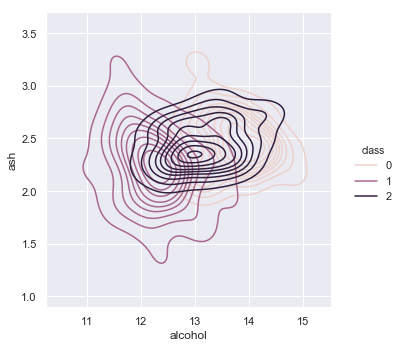

In [43]:
sns.displot(data, x='alcohol', y='ash',hue='class', kind="kde")

C:\Users\Victoria\AppData\Local\conda\conda\envs\my_root\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


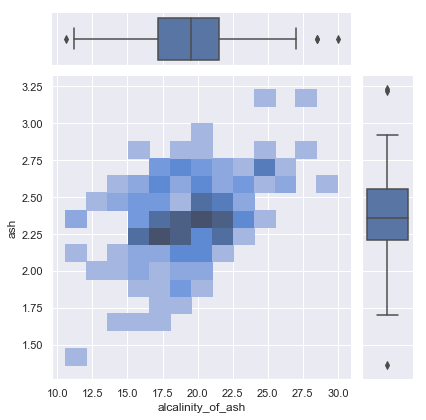

In [51]:
g = sns.JointGrid("alcalinity_of_ash","ash", data)
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)





## Joint plots
- use JointGrid for figures with joint marginal views on bivariate data
- PairGrid- figures with joint and marginal views on multiple variables. good for looking at data with multiple dimensions. 
- jointplot- multiple bivariate plots with univariate marginal distributions.

- joint probability= probability of events A and B
- marginal probability= probability of event X=A given Y
- conditional probability= probability of event A given event B

C:\Users\Victoria\AppData\Local\conda\conda\envs\my_root\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


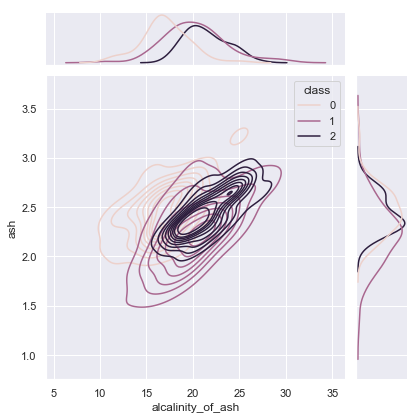

In [49]:
# kind="kde" will draw both bivariate and univariate KDEs

sns.jointplot("alcalinity_of_ash","ash", data, kind='kde', hue='class')
 # other options for kind are;
#'reg'- to add a linear regression fit 
# 'resid' - plot the residuals of a linear regression, univariate marginal distributions
# 'hex' - compute a bivariate histogram using hexagonal bins
# 'scatter'- plots a scatter graph alongside historgrams
# 'hist'-  bin-based visualization of the joint distribution, uses histplot() on all of the axes

C:\Users\Victoria\AppData\Local\conda\conda\envs\my_root\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


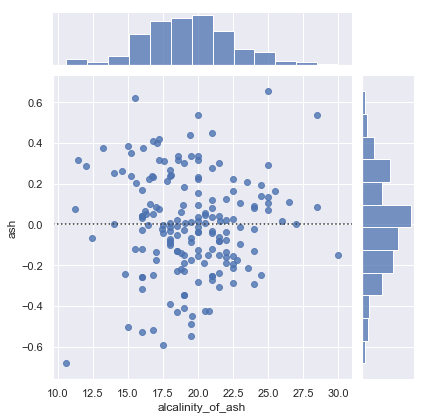

In [16]:
# scatter plot with marginal histograms
sns.jointplot("alcalinity_of_ash","ash", data, kind='resid')


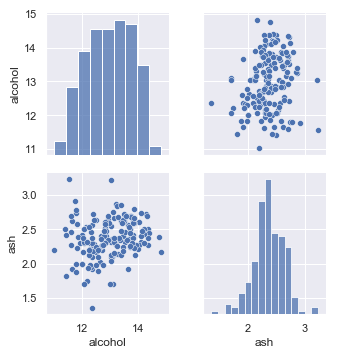

In [52]:
x=data[['alcohol','ash']]
sns.pairplot(x)